<a href="https://colab.research.google.com/github/O-Kpy/Project/blob/main/%EA%B7%B8%EB%A6%B4%EA%B7%B8%EB%A6%B0_%EC%98%88%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
!apt-get update -qq  ## 나눔 설치
!apt-get install fonts-nanum* -qq

import matplotlib as mpl
import matplotlib.font_manager as fm   ## 폰트 매니저
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font) 
mpl.font_manager._rebuild()

In [ ]:
!pip install plotly.express

In [16]:
data_goyong = pd.read_csv('/content/drive/MyDrive/dataset/그릴그린/고용노동부 고용서비스우수기관 현황_20191231.csv', encoding='cp949')
data_gajok = pd.read_csv('/content/drive/MyDrive/dataset/그릴그린/여성가족부_가족친화인증기업 현황_20181231.csv', encoding='cp949')
data_inj = pd.read_csv('/content/drive/MyDrive/dataset/그릴그린/중소벤처기업진흥공단_인재육성형 중소기업 지정기업 명단_20191231.csv', encoding='cp949')
data_nok = pd.read_csv('/content/drive/MyDrive/dataset/그릴그린/환경부_환경경영정보포털_녹색기업 정보_20190927.csv', encoding='cp949')
data_gang = pd.read_excel('/content/drive/MyDrive/dataset/그릴그린/★2021년 청년친화강소기업(게시용).xlsx')

In [34]:
data_gang['지역'] = data_gang['소재지'].apply(lambda x: x.split(' ')[0])

In [41]:
data_gang['지역'] = data_gang['지역'].replace({'서울광역시':'서울특별시', '서울':'서울특별시', '경기':'경기도', '인천':'인천광역시', '부산':'부산광역시', '제주도':'제주특별자치도', '강원':'강원도'})

In [118]:
data_shape = {}
data_name = ['고용 서비스 우수기관', '가족 친화 인증기업', '인재 육성형 중소기업', '녹색 기업', '청년 친화 강소기업']

for j,i in zip([data_goyong, data_gajok, data_inj, data_nok, data_gang], data_name):
  data_shape[i] = j.shape[0]

Text(0.5, 1.0, '청년 친화 강소기업 지역 분포')

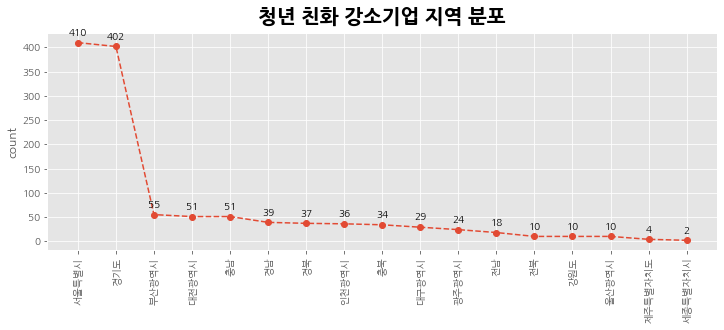

In [131]:
gang_count = data_gang['지역'].value_counts()

plt.figure(figsize=(12,4))
plt.plot(gang_count.index, gang_count, marker='o', linestyle='--')
for i,j in enumerate(gang_count.index):
  plt.annotate(f'{gang_count[j]}', xy=(i, gang_count[j]+20), ha='center', va='center')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.title('청년 친화 강소기업 지역 분포', fontsize=20, fontweight='bold', pad=10)

Text(0.5, 1.0, '녹색 기업 업종 분포')

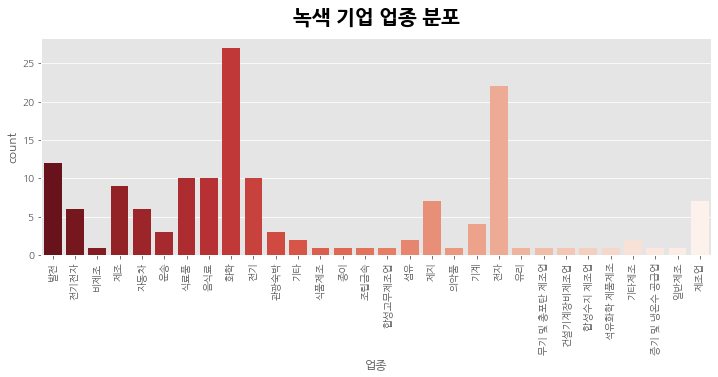

In [104]:
plt.figure(figsize=(12, 4))
sns.countplot(x=data_nok['업종'], palette=sns.color_palette('Reds_r', n_colors=len(data_nok['업종'].unique())), data=data_gang)
for i,j in enumerate(data_nok.unique()):
  plt.annotate(f'{gang_count[j]}', xy=(i, gang_count[j]+20), ha='center', va='center')
plt.xticks(rotation=90)
plt.title('녹색 기업 업종 분포', fontsize=20, fontweight='bold', pad=15)

Text(0.5, 0.98, '가족 친화 인증 기업의 지역별 업종 분포')

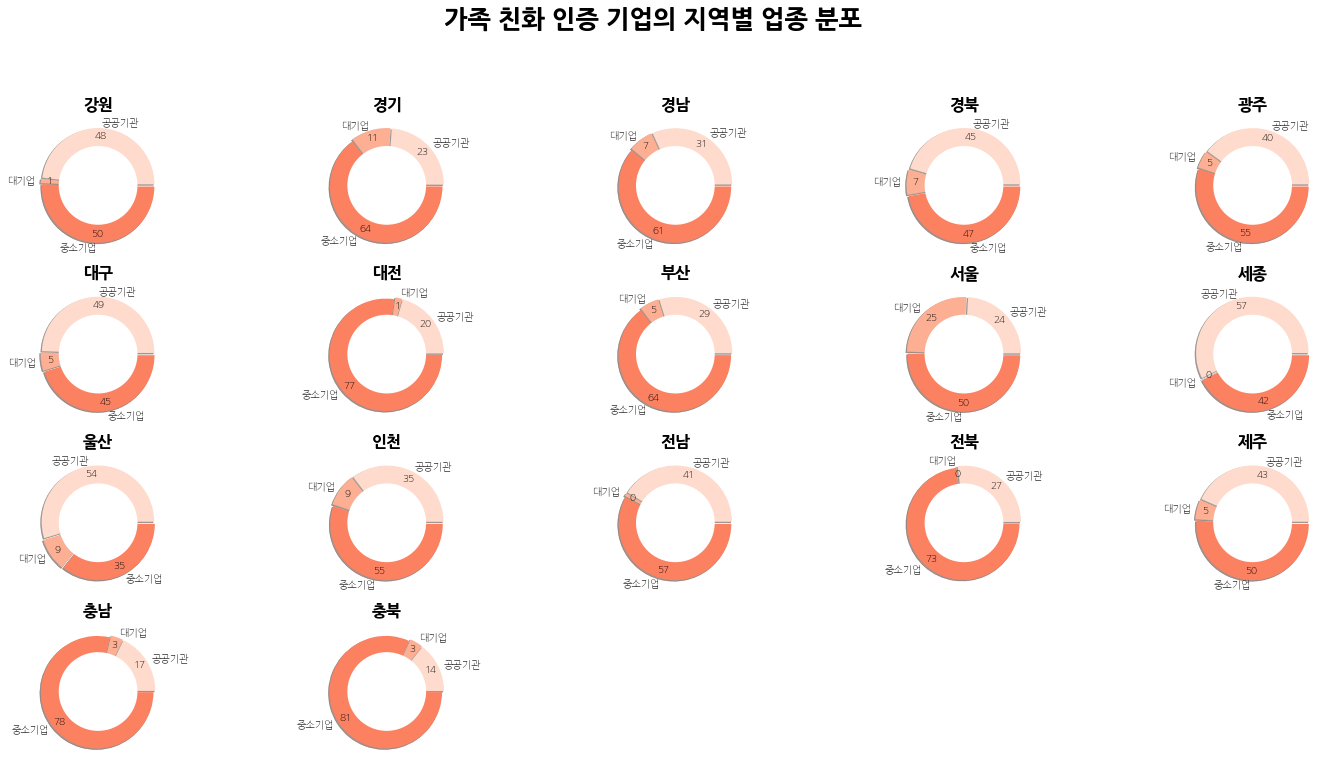

In [136]:
gajok_pie = data_gajok.groupby('시도')['분류'].value_counts().unstack().fillna(0).T

fig = plt.figure(figsize=(25,15))
for i,j in enumerate(gajok_pie.columns):
  ax = plt.subplot(5,5, i+1)
  ax.pie(x=gajok_pie[j], labels=gajok_pie[j].index, shadow=True, explode=[0.02 for i in range(len(gajok_pie[j].index))], 
         colors=sns.color_palette('Reds'), startangle=0, pctdistance=.85, textprops={'weight':'light'}, autopct='%d')
  ax.set_title(f'{j}', fontsize=16, fontweight='bold')
  centre_circle = plt.Circle((0,0), 0.70, color='black', fc='white', linewidth=0)
  ax.add_artist(centre_circle)

plt.suptitle('가족 친화 인증 기업의 지역별 업종 분포', fontsize=25, fontweight='bold')